### Task 1: Basic Probabilities and Visualizations

#### Introduction

Given the parameters \( ξ₁ = 2 \), \( ξ₂ = 62 \), and \( ξ₃ = 0.43 \), the analysis focuses on a **negative binomial distribution**, which is used to model the number of meteorites falling into an ocean in a given year before reaching a specified threshold.

The following steps are conducted:
1. **Visualization**: A probability mass function (PMF) plot is created for the negative binomial distribution, illustrating the probabilities for different numbers of meteorites falling into an ocean before reaching \( k = 62 \) successes, where the probability of success is \( p = 0.43 \).
2. **Numerical Results**: The expectation \( E[X] \) and the median of the distribution are calculated to summarize its key statistical properties.

The analysis employs Python's `scipy.stats` library for statistical computation and `matplotlib` for visualization, ensuring reliable and reproducible results.


40 123


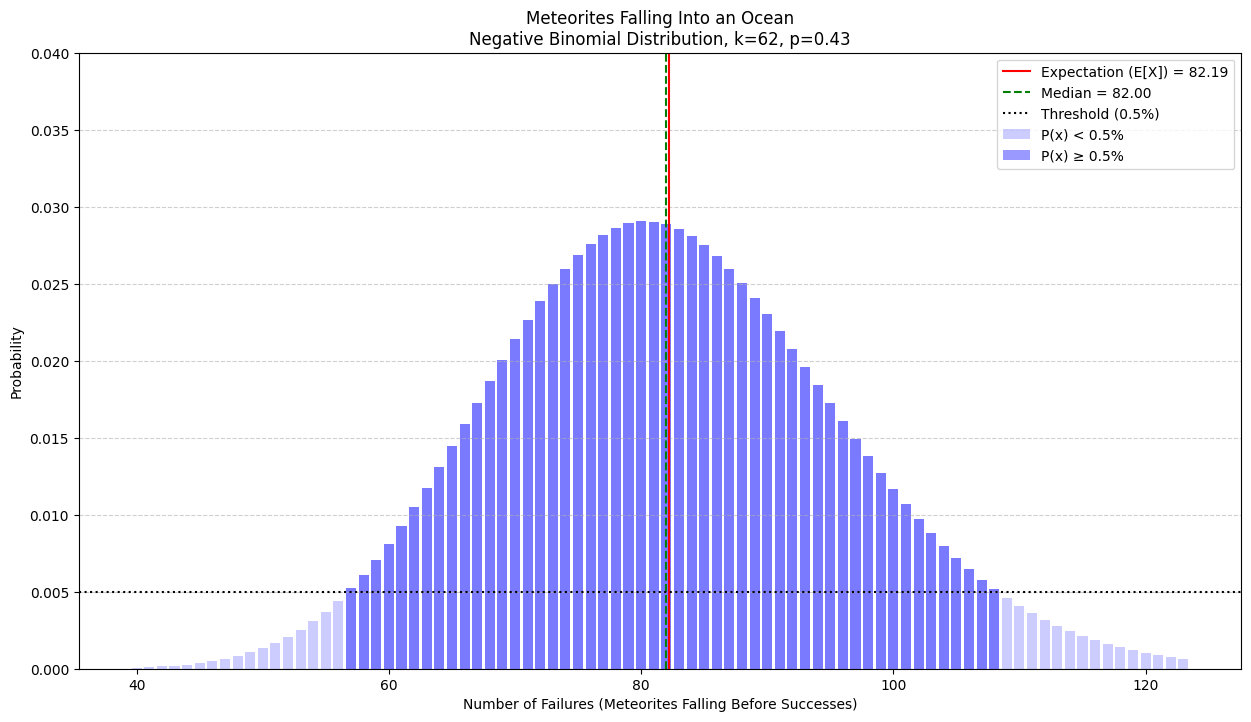

Expectation (E[X]): 82.19
Median: 82.00
Range of outcomes where P(x) >= 0.5%: x ∈ [57, 108]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k = 62  # Number of successes (ξ₂)
p = 0.43  # Probability of success (ξ₃)

# Define the negative binomial distribution
r = k
mean = nbinom.mean(r, p)
std_dev = np.sqrt(nbinom.var(r, p))  # Standard deviation

# Dynamic x range: centered around the mean ± 3 standard deviations
x_min = max(0, int(mean - 3 * std_dev))  # Avoid negative x-values
x_max = int(mean + 3 * std_dev)
x = np.arange(x_min, x_max + 1)  # Dynamic range for the x-axis
probabilities = nbinom.pmf(x, r, p)
print(x_min, x_max)
# Calculate median
median = nbinom.median(r, p)

# Determine the range where P(x) >= 0.5%
threshold = 0.005  # 0.5% in decimal
valid_indices = np.where(probabilities >= threshold)[0]  # Indices where P(x) >= 0.5%
start, end = x[valid_indices[0]], x[valid_indices[-1]]  # Use x-values, not indices

# Determine the range where P(x) >= 0.5%
threshold = 0.005  # 0.5% in decimal
valid_indices = np.where(probabilities >= threshold)[0]  # Indices where P(x) >= 0.5%
start, end = x[valid_indices[0]], x[valid_indices[-1]]  # Use x-values, not indices

# Visualization
plt.figure(figsize=(15, 8))  # Increased width by 25%

# Plot all probabilities
plt.bar(x, probabilities, color="blue", alpha=0.2, label="P(x) < 0.5%")

# Highlight probabilities within the range where P(x) >= 0.5%
if start != 0 and end != 0:  # Ensure there's a valid range
    highlight_indices = (x >= start) & (x <= end)
    plt.bar(x[highlight_indices], probabilities[highlight_indices], color="blue", alpha=0.4, label="P(x) ≥ 0.5%")

# Mark expectation and median as dotted lines
plt.axvline(expectation, color="red", linestyle="-", label=f"Expectation (E[X]) = {expectation:.2f}")
plt.axvline(median, color="green", linestyle="--", label=f"Median = {median:.2f}")

# Horizontal line for the threshold
plt.axhline(threshold, color="black", linestyle=":", label="Threshold (0.5%)")

# Add title, labels, legend, and grid
plt.title(f"Meteorites Falling Into an Ocean\nNegative Binomial Distribution, k={k}, p={p}")
plt.xlabel("Number of Failures (Meteorites Falling Before Successes)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(0, 0.04)  # Adjust y-axis scale for clarity
plt.show()

# Output results
print(f"Expectation (E[X]): {expectation:.2f}")
print(f"Median: {median:.2f}")
print(f"Range of outcomes where P(x) >= 0.5%: x ∈ [{start}, {end}]")


40 123


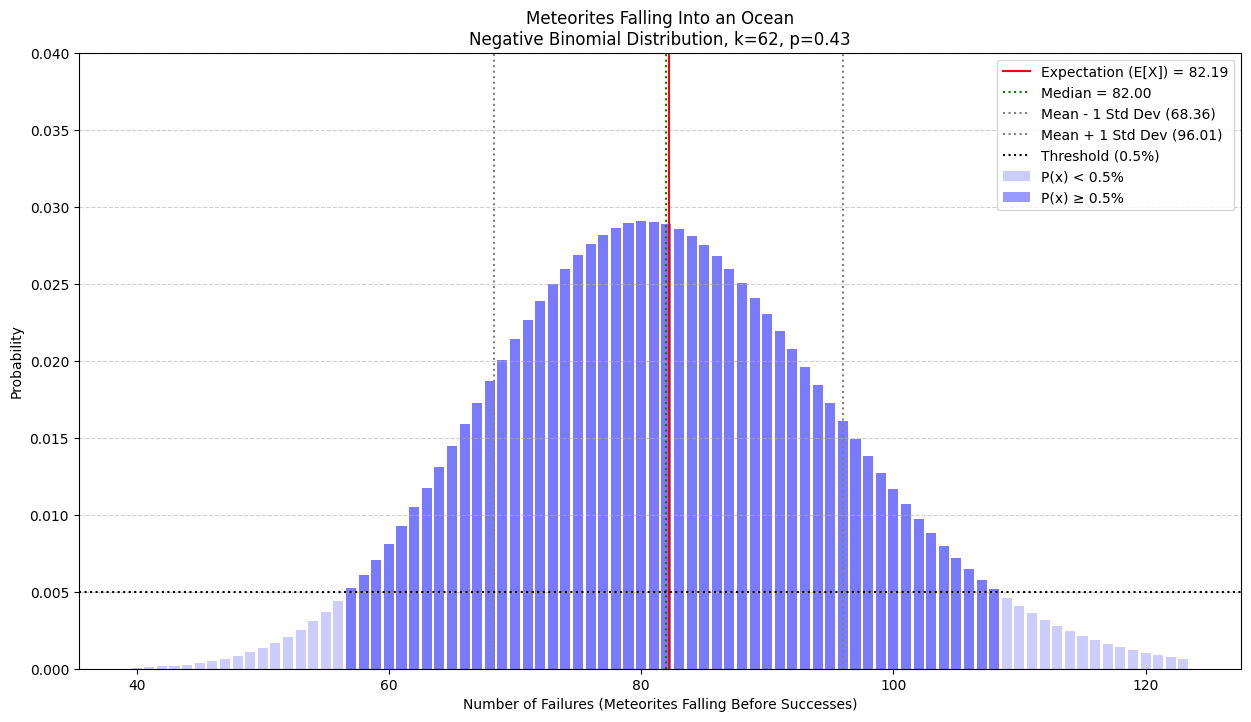

Expectation (E[X]): 82.19
Median: 82.00
Standard Deviation: 13.82
Range of outcomes where P(x) >= 0.5%: x ∈ [57, 108]
x range: [40, 123]


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k = 62  # Number of successes (ξ₂)
p = 0.43  # Probability of success (ξ₃)

# Define the negative binomial distribution
r = k
mean = nbinom.mean(r, p)
std_dev = np.sqrt(nbinom.var(r, p))  # Standard deviation

# Dynamic x range: centered around the mean ± 3 standard deviations
x_min = max(0, int(mean - 3 * std_dev))  # Avoid negative x-values
x_max = int(mean + 3 * std_dev)
x = np.arange(x_min, x_max + 1)  # Dynamic range for the x-axis
probabilities = nbinom.pmf(x, r, p)
print(x_min, x_max)
# Calculate median
median = nbinom.median(r, p)

# Determine the range where P(x) >= 0.5%
threshold = 0.005  # 0.5% in decimal
valid_indices = np.where(probabilities >= threshold)[0]  # Indices where P(x) >= 0.5%
start, end = x[valid_indices[0]], x[valid_indices[-1]]  # Use x-values, not indices

# Visualization
plt.figure(figsize=(15, 8))  # Increased width by 25%

# Plot all probabilities
plt.bar(x, probabilities, color="blue", alpha=0.2, label="P(x) < 0.5%")

# Highlight probabilities within the range where P(x) >= 0.5%
if start != 0 and end != 0:  # Ensure there's a valid range
    highlight_indices = (x >= start) & (x <= end)
    plt.bar(x[highlight_indices], probabilities[highlight_indices], color="blue", alpha=0.4, label="P(x) ≥ 0.5%")

# Mark expectation and median as dotted lines
plt.axvline(mean, color="red", linestyle="-", label=f"Expectation (E[X]) = {mean:.2f}")
plt.axvline(median, color="green", linestyle=":", label=f"Median = {median:.2f}")

# Mark standard deviation as vertical lines
plt.axvline(mean - std_dev, color="grey", linestyle="--", label=f"Mean - 1 Std Dev ({mean - std_dev:.2f})")
plt.axvline(mean + std_dev, color="grey", linestyle="--", label=f"Mean + 1 Std Dev ({mean + std_dev:.2f})")

# Horizontal line for the threshold
plt.axhline(threshold, color="black", linestyle=":", label="Threshold (0.5%)")

# Add title, labels, legend, and grid
plt.title(f"Meteorites Falling Into an Ocean\nNegative Binomial Distribution, k={k}, p={p}")
plt.xlabel("Number of Failures (Meteorites Falling Before Successes)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(0, 0.04)  # Adjust y-axis scale for clarity
plt.show()

# Output results
print(f"Expectation (E[X]): {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range of outcomes where P(x) >= 0.5%: x ∈ [{start}, {end}]")
print(f"x range: [{x_min}, {x_max}]")
